# Import library

# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc
%matplotlib inline

import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)


# 배경색 흰색으로 맞춰줌
import matplotlib as mpl
mpl.rc('figure', facecolor = 'w', edgecolor ='w')

In [2]:
# Data Load
demo = pd.read_csv('data/LPOINT_BIG_COMP_01_DEMO.csv', low_memory=False)
pdde = pd.read_csv('data/LPOINT_BIG_COMP_02_PDDE.csv', low_memory=False)
cop = pd.read_csv('data/LPOINT_BIG_COMP_03_COP_U.csv', low_memory=False)
clac = pd.read_csv('data/LPOINT_BIG_COMP_04_PD_CLAC.csv', low_memory=False)
br = pd.read_csv('data/LPOINT_BIG_COMP_05_BR.csv', low_memory=False)
lpay = pd.read_csv('data/LPOINT_BIG_COMP_06_LPAY.csv', low_memory=False)

# Column명 변경
demo.columns = ['고객번호', '성별', '연령대', '거주지대분류코드']
pdde.columns = ['고객번호', '영수증번호', '채널구분', '제휴사', '점포코드', '상품코드', '구매일자', '구매시간', '구매금액', '구매수량']
cop.columns = ['고객번호', '영수증번호', '제휴사', '점포코드', '채널구분', '이용일자', '방문일자', '이용시간', '이용금액']
clac.columns = ['상품코드', '소분류명', '대분류명', '중분류명']
br.columns = ['점포코드', '제휴사', '점포대분류코드', '점포중분류코드']
lpay.columns = ['고객번호', '영수증번호', '제휴사', '채널구분', '이용일자', '이용시간', '이용금액']

### [1. demo]: Demo

In [3]:
demo.head(3)

,고객번호,성별,연령대,거주지대분류코드
0,M000034966,여성,40대,Z07
1,M000059535,여성,30대,Z12
2,M000136117,여성,30대,Z11


In [4]:
# 데이터 타입 확인
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29913 entries, 0 to 29912
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   고객번호      29913 non-null  object
 1   성별        29913 non-null  object
 2   연령대       29913 non-null  object
 3   거주지대분류코드  29913 non-null  object
dtypes: object(4)
memory usage: 934.9+ KB


In [5]:
# 결측치 확인
demo.isna().sum()

고객번호        0
성별          0
연령대         0
거주지대분류코드    0
dtype: int64

In [6]:
# 데이터 갯수 확인
demo.nunique()

고객번호        29913
성별              2
연령대             6
거주지대분류코드       17
dtype: int64

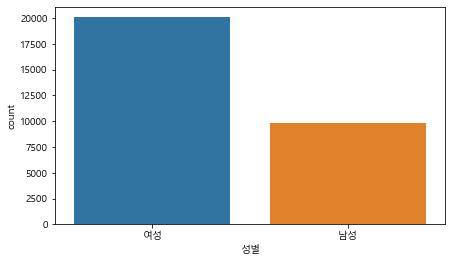

In [7]:
# 성별
plt.figure(figsize = (7, 4))
sns.countplot(x='성별', data=demo)
plt.show()

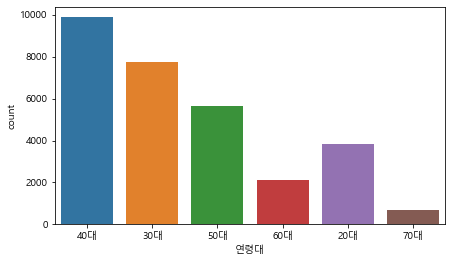

In [8]:
# 연령대
plt.figure(figsize = (7, 4))
sns.countplot(x='연령대', data=demo)
plt.show()

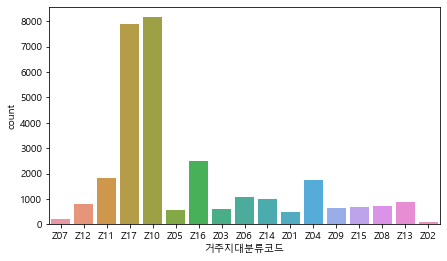

In [9]:
# 거주지대분류코드
plt.figure(figsize = (7, 4))
sns.countplot(x='거주지대분류코드', data=demo)
plt.show()

### [2. pdde]: 상품 구매 정보

In [10]:
pdde.head(3)

,고객번호,영수증번호,채널구분,제휴사,점포코드,상품코드,구매일자,구매시간,구매금액,구매수량
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1


In [11]:
# 중복되는 행 제거 -> 데이터 추출시 고객, 상품 각각 추출하여 중복이 발생한 것으로 판단함
pdde.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

In [12]:
# 데이터 타입 확인
pdde.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4144389 entries, 0 to 4381733
Data columns (total 10 columns):
 #   Column  Dtype  
---  ------  -----  
 0   고객번호    object 
 1   영수증번호   object 
 2   채널구분    int64  
 3   제휴사     object 
 4   점포코드    object 
 5   상품코드    object 
 6   구매일자    int64  
 7   구매시간    int64  
 8   구매금액    float64
 9   구매수량    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 347.8+ MB


In [13]:
# 결측치 확인
pdde.isna().sum()

고객번호          0
영수증번호         0
채널구분          0
제휴사           0
점포코드     375784
상품코드          0
구매일자          0
구매시간          0
구매금액          0
구매수량          0
dtype: int64

In [14]:
# 상품 구매 정보 테이블 내에 점포 코드 결측치는 온라인으로 주문한 것을 확인할 수 있음. 온라인으로 주문한 뒤에 택배로 수령
pdde[pdde['점포코드'].isna()]['채널구분'].unique()

array([2], dtype=int64)

In [15]:
# 결측치 치환 -> na값을 온라인으로 채워줌
pdde['점포코드'] = pdde['점포코드'].fillna('온라인')

In [16]:
# 데이터 갯수 확인
pdde.nunique()

고객번호       26917
영수증번호    1266589
채널구분           2
제휴사            6
점포코드        6756
상품코드        1933
구매일자         365
구매시간          24
구매금액       33791
구매수량          85
dtype: int64

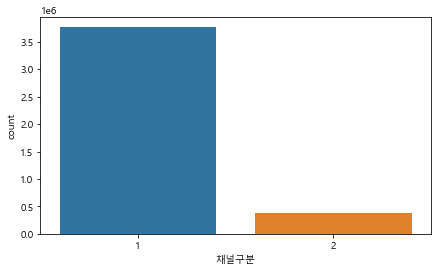

In [17]:
# 채널구분
plt.figure(figsize = (7, 4))
sns.countplot(x='채널구분', data=pdde)
plt.show()

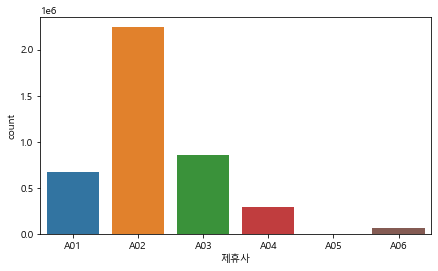

In [18]:
# 제휴사
plt.figure(figsize = (7, 4))
sns.countplot(x='제휴사', data=pdde)
plt.show()

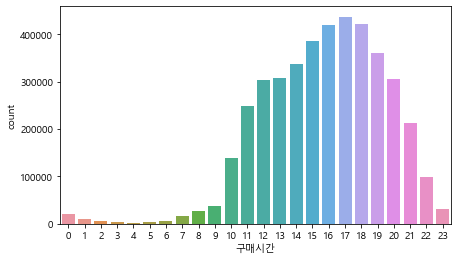

In [19]:
# 구매시간
plt.figure(figsize = (7, 4))
sns.countplot(x='구매시간', data=pdde)
plt.show()

### [3. cop]: 제휴사 이용 정보

In [20]:
cop.head(3)

,고객번호,영수증번호,제휴사,점포코드,채널구분,이용일자,방문일자,이용시간,이용금액
0,M839993508,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000
1,M839993508,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100
2,M839993508,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500


In [21]:
# 데이터 타입 확인
cop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248304 entries, 0 to 248303
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   고객번호    248304 non-null  object
 1   영수증번호   248304 non-null  object
 2   제휴사     248304 non-null  object
 3   점포코드    248249 non-null  object
 4   채널구분    248304 non-null  int64 
 5   이용일자    248304 non-null  int64 
 6   방문일자    248304 non-null  int64 
 7   이용시간    248304 non-null  int64 
 8   이용금액    248304 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 17.0+ MB


In [22]:
# 결측치 확인
cop.isna().sum()

고객번호      0
영수증번호     0
제휴사       0
점포코드     55
채널구분      0
이용일자      0
방문일자      0
이용시간      0
이용금액      0
dtype: int64

In [23]:
# 제휴사 이용 정보 테이블 내에 점포 코드 결측치는 온라인으로 주문한 것을 확인할 수 있음. 온라인으로 주문한 뒤에 택배로 수령
cop[cop['점포코드'].isna()]['채널구분'].unique()

array([2], dtype=int64)

In [24]:
# 결측치 치환
cop['점포코드'] = cop['점포코드'].fillna('온라인')

In [25]:
# 데이터 갯수 확인
cop.nunique()

고객번호      21769
영수증번호    248304
제휴사           6
점포코드       2030
채널구분          2
이용일자        369
방문일자        366
이용시간         24
이용금액       9420
dtype: int64

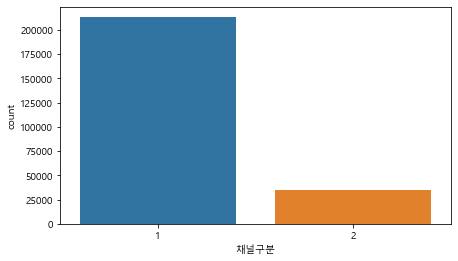

In [26]:
# 채널구분
plt.figure(figsize = (7, 4))
sns.countplot(x='채널구분', data=cop)
plt.show()

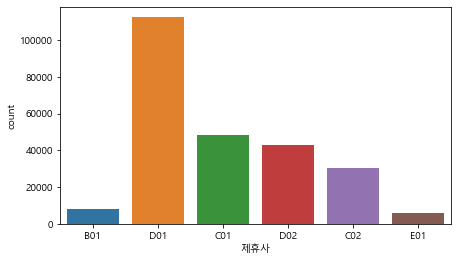

In [27]:
# 제휴사
plt.figure(figsize = (7, 4))
sns.countplot(x='제휴사', data=cop)
plt.show()

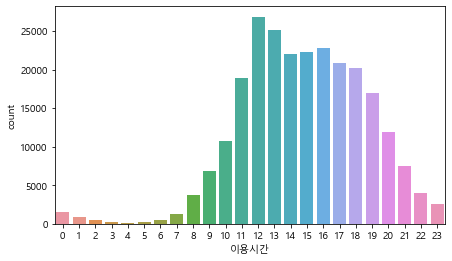

In [28]:
# 이용시간
plt.figure(figsize = (7, 4))
sns.countplot(x='이용시간', data=cop)
plt.show()

### [4. clac]: 상품 분류 정보

In [29]:
clac.head(3)

,상품코드,소분류명,대분류명,중분류명
0,PD0001,소파,가구,거실가구
1,PD0002,스툴/리빙의자,가구,거실가구
2,PD0003,탁자,가구,거실가구


In [30]:
# 데이터 타입 확인
clac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품코드    1933 non-null   object
 1   소분류명    1933 non-null   object
 2   대분류명    1933 non-null   object
 3   중분류명    1933 non-null   object
dtypes: object(4)
memory usage: 60.5+ KB


In [31]:
# 결측치 확인
clac.isna().sum()

상품코드    0
소분류명    0
대분류명    0
중분류명    0
dtype: int64

In [32]:
# 데이터 갯수 확인
clac.nunique()

상품코드    1933
소분류명    1932
대분류명      60
중분류명     349
dtype: int64

### [5. br]: 점포 정보

In [33]:
br.head(3)

,점포코드,제휴사,점포대분류코드,점포중분류코드
0,A010001,A01,Z17,Z17024
1,A010002,A01,Z17,Z17018
2,A010003,A01,Z17,Z17011


In [34]:
# 데이터 타입 확인
br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8808 entries, 0 to 8807
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   점포코드     8808 non-null   object
 1   제휴사      8808 non-null   object
 2   점포대분류코드  8808 non-null   object
 3   점포중분류코드  8808 non-null   object
dtypes: object(4)
memory usage: 275.4+ KB


In [35]:
# 결측치 확인
br.isna().sum()

점포코드       0
제휴사        0
점포대분류코드    0
점포중분류코드    0
dtype: int64

In [36]:
# 데이터 갯수 확인
br.nunique()

점포코드       8808
제휴사          11
점포대분류코드      17
점포중분류코드     257
dtype: int64

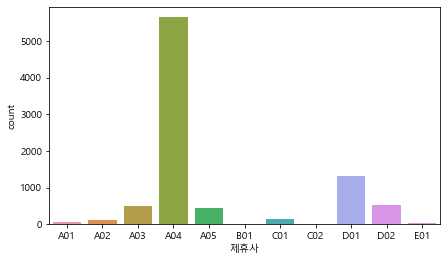

In [37]:
# 제휴사
plt.figure(figsize = (7, 4))
sns.countplot(x='제휴사', data=br)
plt.show()

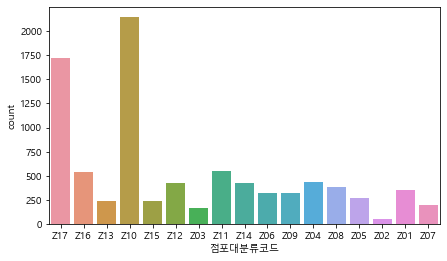

In [38]:
# 점포대분류코드
plt.figure(figsize = (7, 4))
sns.countplot(x='점포대분류코드', data=br)
plt.show()

### [6. lpay]: 엘페이 이용

In [39]:
lpay.head(3)

,고객번호,영수증번호,제휴사,채널구분,이용일자,이용시간,이용금액
0,M629656521,210803210311226,A03,1,20210803,21,10900
1,M216016456,210803130167542,L01,2,20210803,13,6860
2,M205142844,210803140275112,A02,1,20210803,14,9000


In [40]:
# 데이터 타입 확인
lpay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353184 entries, 0 to 353183
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   고객번호    353184 non-null  object
 1   영수증번호   353184 non-null  int64 
 2   제휴사     353184 non-null  object
 3   채널구분    353184 non-null  int64 
 4   이용일자    353184 non-null  int64 
 5   이용시간    353184 non-null  int64 
 6   이용금액    353184 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 18.9+ MB


In [41]:
# 결측치 확인
lpay.isna().sum()

고객번호     0
영수증번호    0
제휴사      0
채널구분     0
이용일자     0
이용시간     0
이용금액     0
dtype: int64

In [42]:
# 데이터 갯수 확인
lpay.nunique()

고객번호       8906
영수증번호    353184
제휴사          14
채널구분          2
이용일자        365
이용시간         24
이용금액      37755
dtype: int64

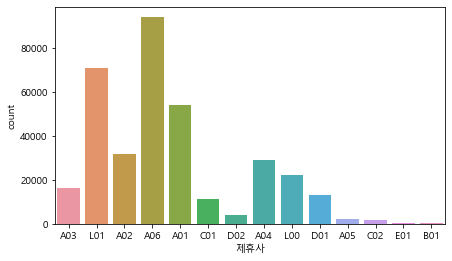

In [43]:
# 제휴사
plt.figure(figsize = (7, 4))
sns.countplot(x='제휴사', data=lpay)
plt.show()

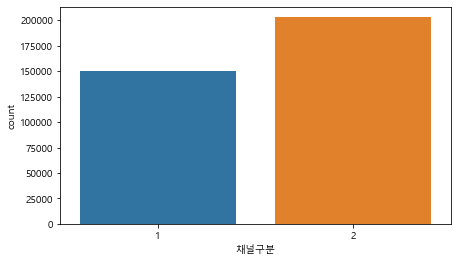

In [44]:
# 채널구분
plt.figure(figsize = (7, 4))
sns.countplot(x='채널구분', data=lpay)
plt.show()

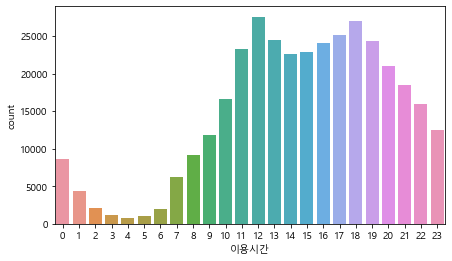

In [45]:
# 이용시간
plt.figure(figsize = (7, 4))
sns.countplot(x='이용시간', data=lpay)
plt.show()

# Data Merge

In [46]:
# 데이터 크기 확인
print('pdde :',pdde.shape)
print('copu :',cop.shape)
print('lpay :',lpay.shape)

pdde : (4144389, 10)
copu : (248304, 9)
lpay : (353184, 7)


In [47]:
# # 칼럼별 상관관계 확인
# # 제휴사 테이블 중에서 방문일자와 이용일자는 상관관계가 상당히 높게 나타남을 확인
# # 제휴사 테이블 내 방문일자 제거
# plt.figure(figsize=(15,15))
# sns.heatmap(data = cop.corr(), annot=True,fmt = '.2f', linewidths=.5, cmap='Blues')

In [48]:
# 데이터를 통합하기 위하여 칼럼 통합
pdde['타입'] = 'Product'
cop['타입'] = 'Affiliate'
lpay['타입'] = 'Lpay'
pdde['방문일자'] = 0
lpay['방문일자'] = 0
cop['구매수량'] = 0
cop['상품코드'] = np.nan
lpay['점포코드'] = np.nan
lpay['상품코드'] = np.nan
lpay['구매수량'] = 0

In [49]:
# 칼럼명을 새롭게 동일하게 통일
cop.columns = ['고객번호', '영수증번호', '제휴사', '점포코드', '채널구분', '구매일자', '방문일자', '구매시간', '구매금액', '타입', '구매수량', '상품코드']
lpay.columns = ['고객번호', '영수증번호', '제휴사', '채널구분', '구매일자', '구매시간', '구매금액', '타입', '방문일자', '점포코드', '상품코드', '구매수량']

# 상품구매데이터를 기준으로 하여 열을 통일
cop = cop[['고객번호', '영수증번호', '채널구분', '제휴사', '점포코드', '상품코드', '구매일자', '방문일자', '구매시간', '구매금액', '구매수량', '타입']]
lpay = lpay[['고객번호', '영수증번호', '채널구분', '제휴사', '점포코드', '상품코드', '구매일자', '방문일자', '구매시간', '구매금액', '구매수량', '타입']]

# 데이터 타입 변경
lpay['영수증번호'] = lpay['영수증번호'].astype('object')
lpay['점포코드'] = lpay['점포코드'].astype('object')
cop['상품코드'] = cop['상품코드'].astype('object')
lpay['상품코드'] = lpay['상품코드'].astype('object')
pdde['구매금액'] = pdde['구매금액'].astype('int')
pdde['방문일자'] = pdde['방문일자'].astype('int64')
lpay['방문일자'] = lpay['방문일자'].astype('int64')

In [50]:
# 데이터 concat
df = pd.concat([pdde,cop,lpay])
# 고객 정보 테이븛 통합
df = pd.merge(df, demo, on = ['고객번호'], how = 'left')
# 상품 분류 테이블 통합
df = pd.merge(df, br, on = ['점포코드','제휴사'], how = 'left')
# 점포 정보 테이블 통합
df = pd.merge(df, clac, on = ['상품코드'], how = 'left')

In [51]:
# 결측치 확인
df.isnull().sum()

고객번호             0
영수증번호            0
채널구분             0
제휴사              0
점포코드        353184
상품코드        601488
구매일자             0
구매시간             0
구매금액             0
구매수량             0
타입               0
방문일자             0
성별               0
연령대              0
거주지대분류코드         0
점포대분류코드     729023
점포중분류코드     729023
소분류명        601488
대분류명        601488
중분류명        601488
dtype: int64

In [52]:
print('<엘페이>')
print(lpay.isnull().sum())
print('<제휴사>')
print(cop.isnull().sum())
print('<상품구매>')
print(pdde.isnull().sum())

<엘페이>
고객번호          0
영수증번호         0
채널구분          0
제휴사           0
점포코드     353184
상품코드     353184
구매일자          0
방문일자          0
구매시간          0
구매금액          0
구매수량          0
타입            0
dtype: int64
<제휴사>
고객번호          0
영수증번호         0
채널구분          0
제휴사           0
점포코드          0
상품코드     248304
구매일자          0
방문일자          0
구매시간          0
구매금액          0
구매수량          0
타입            0
dtype: int64
<상품구매>
고객번호     0
영수증번호    0
채널구분     0
제휴사      0
점포코드     0
상품코드     0
구매일자     0
구매시간     0
구매금액     0
구매수량     0
타입       0
방문일자     0
dtype: int64


In [53]:
df.head(3)

,고객번호,영수증번호,채널구분,제휴사,점포코드,상품코드,구매일자,구매시간,구매금액,구매수량,타입,방문일자,성별,연령대,거주지대분류코드,점포대분류코드,점포중분류코드,소분류명,대분류명,중분류명
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000,1,Product,0,여성,50대,Z17,Z10,Z10042,남성티셔츠,남성의류,남성의류상의
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700,1,Product,0,여성,40대,Z13,Z13,Z13001,기타주방일회용품,주방잡화,주방일회용품
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000,1,Product,0,여성,50대,Z17,Z10,Z10042,남성티셔츠,남성의류,남성의류상의


In [54]:
data = df.copy()

In [55]:
# 데이터 분리
df1 = data[data['타입']== 'Product']
df2 = data[data['타입']== 'Affiliate']
df3 = data[data['타입']== 'Lpay']

## END